# Project: Investigate a Dataset (TMDb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

To complete my Data Analysis project I am using TMDb movies dataset. This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

### Question that can analyised from this data set:

- Movies which had most and least profit
-  Movies with largest and lowest budgets
- Movies with most and least earned revenue
- Average runtime of the movies
- In which year we had the most movies making profits?
- Average Revenue of Movies  
- Which directer directed most films?
- Whcih cast has appeared the most?.
- Which genre were more successful?
- Average Budget of Movies.

In [2]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

### General Properties

In [3]:

#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
tmdb_data.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(tmdb_data.shape[0],tmdb_data.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

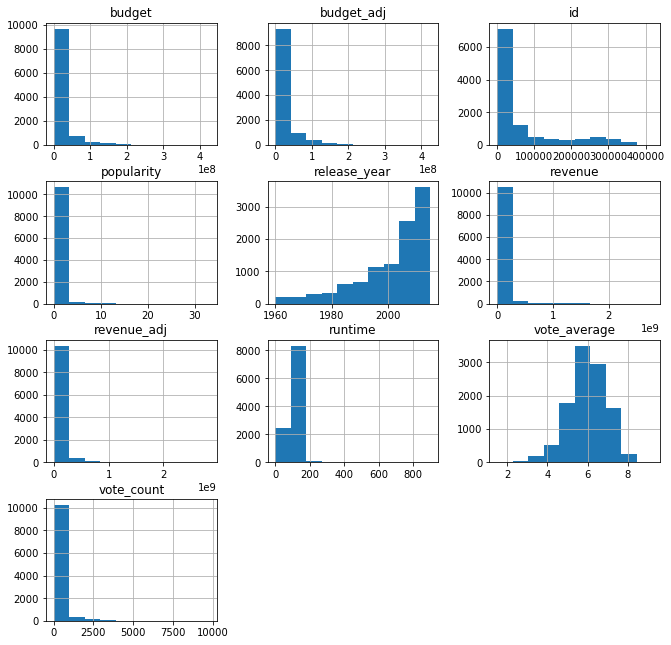

In [5]:
tmdb_data.hist(figsize=(11,11));

In [6]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning


- We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
- Removing the duplicacy in the rows(if any).
- Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries.
- Changing release date column into date format.
- Replacing zero with NAN in runtime column.
- Changing format of budget and revenue column.

### Removing Unused columns


#### - Columns that we need to delete are

Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [7]:
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015


### Removing the duplicacy in the rows(if any)

Here we can see how many entries we have in the databas

In [8]:
rows, col = tmdb_data.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 10 no.of columns in it.


In the next step we should removing the duplicate rows if any

### Changing the release date column into standard date format


In [9]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [10]:
# printing the changed dataset
tmdb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Replacing zero with NAN in runtime column.

In [11]:
#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

### Changing format of budget and revenue column.

Checking the current format of columns in the dataset

In [12]:
#printing the data type of the data set
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [13]:
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

## Exploratory Data Analysis

- Calculating the profit of the each movie

In [14]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])

#previewing the changes in the dataset
tmdb_data.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


## Research Question 1 : Movies which had most and least profit

In [15]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


- Column with ID 1386 shows the highest earned profit i.e 2544505847 .
- Where the column with ID 2244 shows the lowest earned profit i.e -41391243

## Research Question 2 : Movies with largest and lowest budgets

In [16]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,30
budget,425000000,0
revenue,11087569,29355203
profit_earned,-413912431,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


- The column with ID 30 shows the smallest budget i.e 0 dollar 
- Column with ID 2244 shows the largest budget i.e 425000000 dollar

## Research Question 3 : Movies with most and least earned revenue

In [17]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,48
budget,237000000,30000000
revenue,2781505847,0
profit_earned,2544505847,-30000000
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


- The column with ID 48 shows the smallest budget i.e 0 dollar 
- Column with ID 1386 shows the largest budget i.e 2781505847 dollar

## Research Question 4 : Average runtime of the movies

In [32]:
#giving a function which calculates average of a particular column
def average_func(column_name):
    
    return tmdb_data[column_name].mean()

In [33]:
#calling function to show the mean
average_func('runtime')

102.3628980156899

So the average runtime a movie is 102 minutes. Lets analyse it in a visual form i.e. by graphical approach.

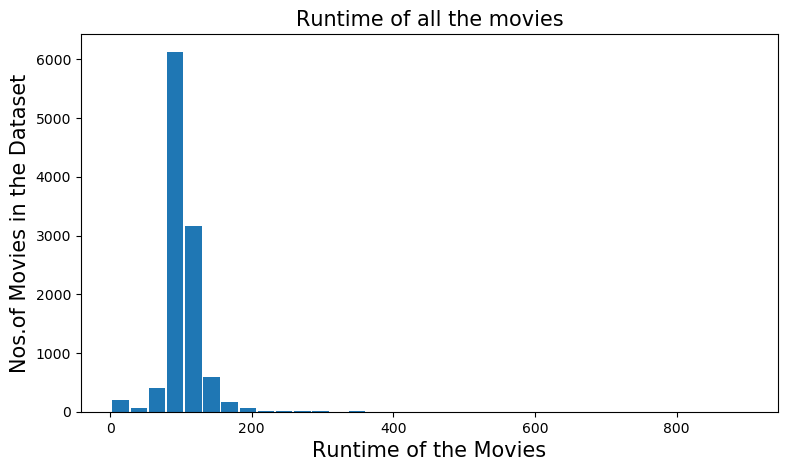

In [34]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 50 to 100 minutes.Almost 6000 and more no.of movies fall in this criteria.

Lets analyse more about runtime of the movie using different kind of plots i.e Box Plot.

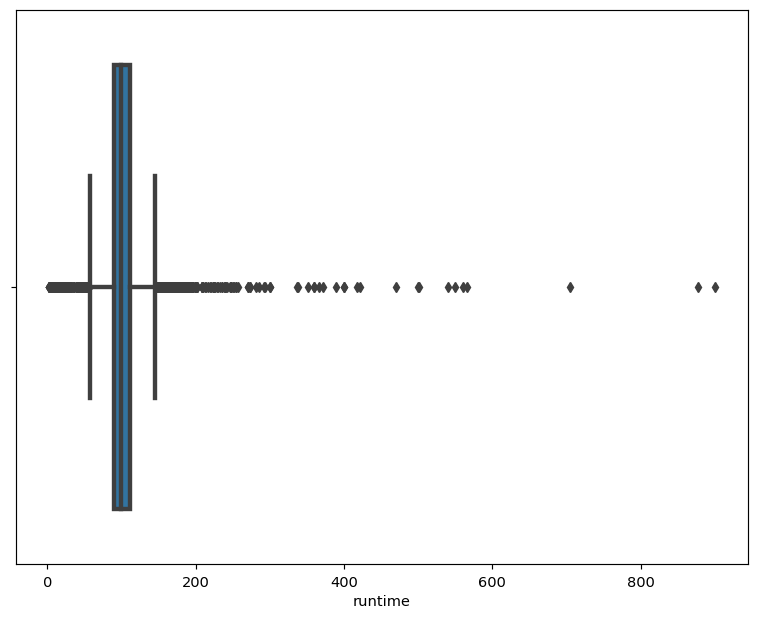

In [35]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_data['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

In [36]:
#getting specific runtime 
tmdb_data['runtime'].describe()

count    10835.000000
mean       102.362898
std         30.946957
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Thats amazing!! The plot generated above give a visual of complete distribution of runtime of movies by plotting the points againts their respective position in the ditribution
Coming to our plot i.e. box-plot, It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies. we also get the outliners her if you carefully observe the plot.
By looking at the plot and calculations, we can conclude that.
- 25% of movies have a runtime of less than 95 minutes.
- 50% of movies have a runtime of less than 100 minutes. (median)
- 75% of movies have a runtime of less than 115 minutes.

All the profits of the movies are now listed and our now a part of our dataset.

## Research Question 5 : In which year we had the most movies making profits?

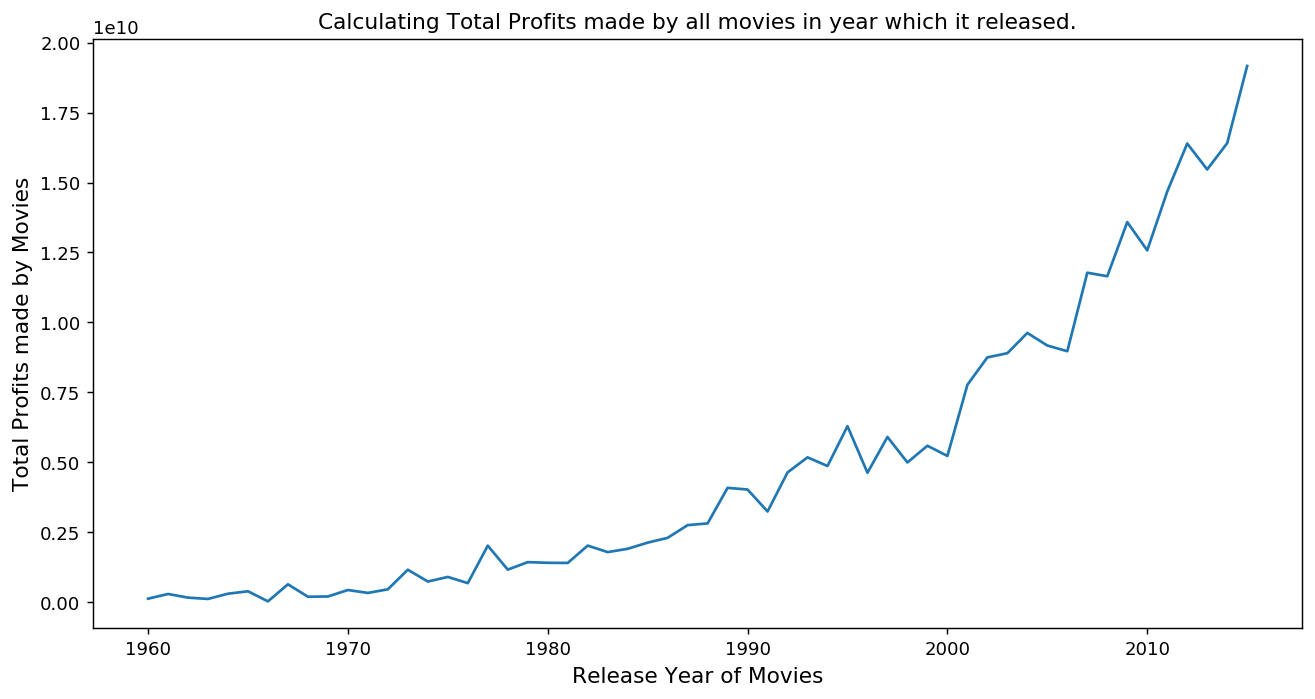

In [61]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = tmdb_data.groupby('release_year')['profit_earned'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had the same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

This dataset also does not show all the movies that have been released in each year. If it would the graph might would show some different trend.

Also to note, In the dataset, there were also movies that had negative profits which drags down the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie Avatar in 2009 alone drags the profit up by 2.5 billion dollars out of 14 billion dollars (calculations below).

For convenience, i have shown which year had the most profit. 

In [42]:
#this answers our question
#shows which year made the highest profit
profits_each_year.idxmax()

2015

In [43]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit_earned
release_year,
2011,14677437926
2012,16394344772
2013,15467594656
2014,16407160045
2015,19165902961


2015 was the year where movies made the highest profit of about 19+ billion dollars which released in that year.

We are now done with exploring the dataset given. Now we want to find similar characteristics of most profitable movies.

So we need to dig deeper, and that's what we as Data Analysts do! 


Interesting! The mean time for movies making significant profits is likely similar to the mean runtime of movies that we found before of 109.2 which included movies having less than $50M profits. Difference of 4 minutes.


The average budget of movies of $46M club in profit is around `$56M dollars`.

## Research Question 6 : Average Revenue of Movies  

In [62]:
#calling the function
average_func('profit_earned') 

25197618.699245352

The average profits of movies of $50M club in profit is around `$25M dollars`

## Research Question 7 : Which directer directed most films?

In [54]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = tmdb_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [55]:
#this will variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23
dtype: int64

Voila!! 'Steven Spielberg' takes the crown! Directing 23 movies over $50M+ in profit  Also the other directors following along the list such as 'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc prove to be really great directors. Movies directed by these directors is more likely for a movie to make huge profits, the higher the movies they direct that earn huge profits, the higher the probability for a movie to go for success! Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always earn this much but gives us the idea that how much likely it is when it is directed by them.

## Research Question 8 : Whcih cast has appeared the most?

In [56]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

Mind Blowing results atleast to me! 'Tome Cruise' takes the crown for appearing the most in movies profiting more than $50M. Other actors well deserved it as you can see above! Directors hiring these actors will have higher probability of making huge profits also this doesn't mean that actors other than these acting in a film will make less profit. Famous actors such as 'Tom Cruise', 'Brad Pitt', 'Tom Hanks', 

As we said for the directors, goes for the actors too as well! SInce we don't really know how many movies these actors have acted in total in their lifetime, we can't always be sure that movies acted by these actors will always earn this much but gives us the idea that how much likely it is when it is acted by them.


## Research Question 9 : Which genre were more successful?

In [57]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64

Lets visualize this with a plot.

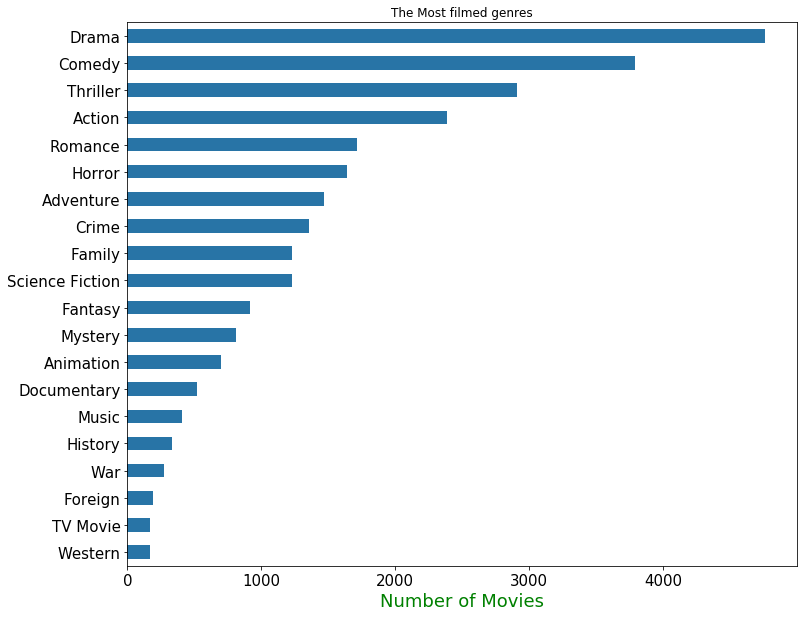

In [58]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#2874A6', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Another amazing results. Action, Drama and Comedy genres are the most as visualized but Comedy takes the prize, about 492 movies have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$50M for these genres are higher, but still other genres do count too again it depends on lots of other influential factors that come in play. Western, war, history, music, documentary and the most least foreign genres have less probability to make this much in profit as in comparison to other genre.
.

## Research Question 10 :  Average Budget of Movies

In [60]:
average_func('budget')

14625701.09414688

## Conclusion

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following

### For a Movie to be in successful criteria


- Choose any director from this -  Woody Allen ,Clint Eastwood, Martin Scorsese,Martin Scorsese .

- Choose any cast from this  Robert De Niro ,  Samuel L. Jackson ,Bruce Willis 

- Choose these genre - Action, Romance, Thriller, Comedy, Drama.

- Budget of the movie should be around 14 millon .

- Revenue of the movie should be around 25 millon . 

#### Limitations

I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. 
